In [1]:
%precision %.2f
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 12)
import pandas as pd
import numpy as np
from datetime import date

import src.compute.tickets as tickets
import src.compute.changelogs as changelogs
from src.compute.utils import Interval, statuses_of_interest
from src.db.utils import SnowflakeWrapper
from src.config import data_root

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
conn = SnowflakeWrapper.create_snowflake_connection()
sw = SnowflakeWrapper(conn)

In [2]:
active_interval: Interval = Interval(
    # fromDate=date(2019, 7, 1), # year, month, day
    # toDate=date(2019, 10, 1),
    fromDate=date(2019, 10, 1), # year, month, day
    toDate=date(2020, 1, 1)
)
print("Active interval:", active_interval)

Active interval: ('2019-10-01', '2020-01-01')


In [33]:
def plot_data(
    data: pd.Series,
    xlab: str = "#days",
    ylab: str = "frequency",
    num_bins: int = 30,
    note: str = ""
):
    fig = plt.figure()
    plt.hist(data, bins=num_bins, alpha=0.75, edgecolor='black')
    # plt.xticks(np.arange(np.ceil(data.min()) - 2,np.ceil(data.max()) + 2,1))
    plt.axvline(data.mean(), color='black', linestyle='dashed', linewidth=2, label=f"Mean = {data.mean():.3f}")
    # plt.axvline(chosen_ticket["AVG_HOUR"], color='g', linestyle='dashed', linewidth=2, label=f'Chosen user = {chosen_user["AVG_HOUR"]:.3f}')

    plt.title(f"Distribution of {note} [{len(data)}]")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend()
    plt.grid()
    fnote = note.lower().replace(' ', '_')
    plt.savefig(f"{data_root}/figs/ticket_comparison_"
                f"{xlab.lower()}_"
                f"{f'{fnote}_' if len(fnote) > 0 else ''}"
                f"hist.png")
    plt.show()

In [4]:
tickets_active_on_interval = changelogs.tickets_active_on_interval(sw, active_interval)
print(f"Number of tickets active on {active_interval}: {len(tickets_active_on_interval)}")

Number of tickets active on ('2019-10-01', '2020-01-01'): 2969


In [11]:
by_status = tickets.get_tickets(sw, active_interval)

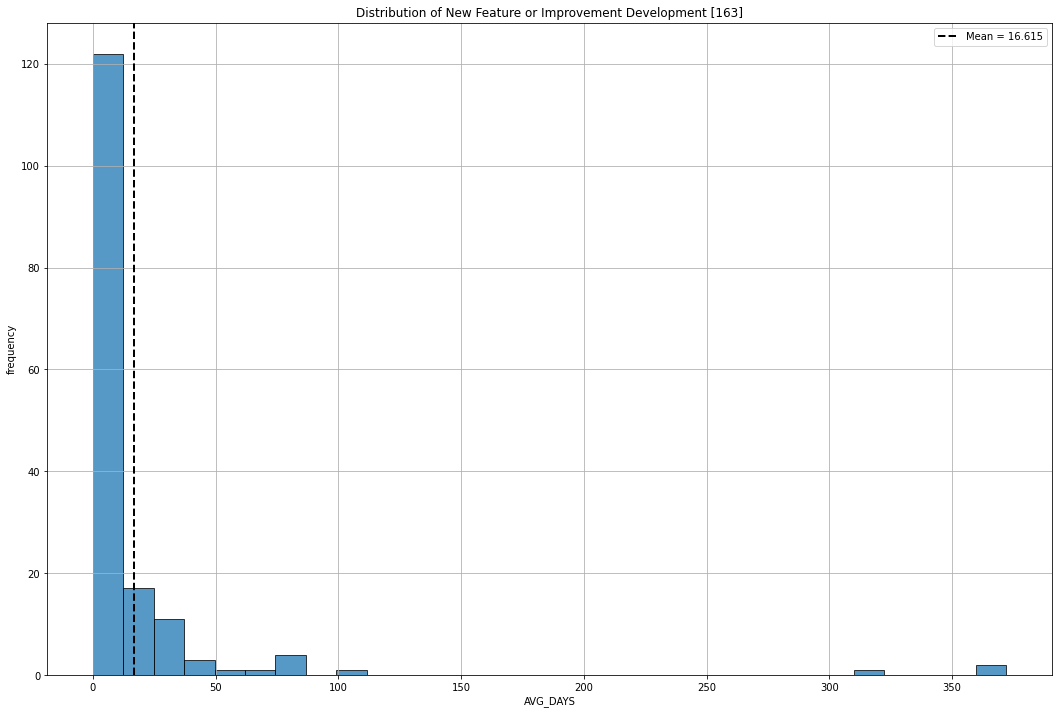

In [35]:
issueType = 'New Feature or Improvement'
status = 'Development'
metric = 'AVG_DAYS'
data = by_status.loc[
    (by_status['IssueType'] == issueType) &
    (by_status['STATUS'] == status)
][metric] # & by_status['IssueType'] == 'Bug']['AVG_DAYS']

plot_data(data, note=f"{issueType} {status}", xlab=metric)

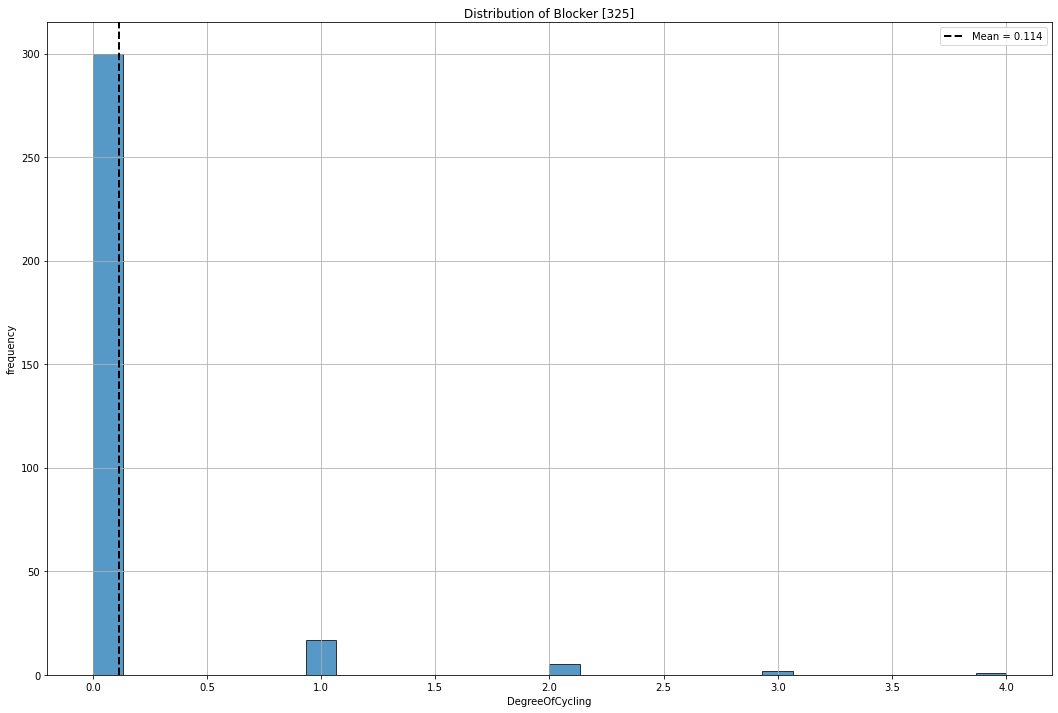

In [65]:
# issueType = 'New Feature or Improvement'
status = 'Development'
issuePriority = 'Blocker'
# metric = 'AVG_DAYS'
metric = 'DegreeOfCycling'
data = by_status.loc[
    (by_status['IssuePriority'] == issuePriority)
    # & (by_status['IssueType'] == issueType)
    # & (by_status['STATUS'] == status)
][metric]

plot_data(data, note=f"{issuePriority}", xlab=metric, num_bins=30)